<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-13 21:43:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  45.5MB/s    in 4.6s    

2026-02-13 21:43:58 (43.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 175.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 184.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 176.0 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


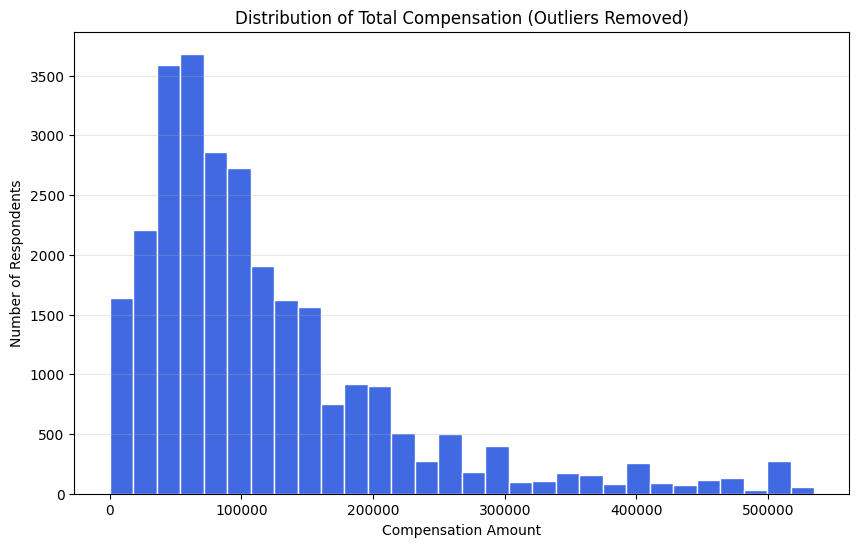

Original Rows: 33740
Rows after filtering: 27864
Upper Bound was: 535000.0


In [11]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn).dropna()

Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, color='royalblue', edgecolor='white')

plt.title('Distribution of Total Compensation (Outliers Removed)')
plt.xlabel('Compensation Amount')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.3)

plt.show()

print(f"Original Rows: {len(df)}")
print(f"Rows after filtering: {len(df_filtered)}")
print(f"Upper Bound was: {upper_bound}")


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


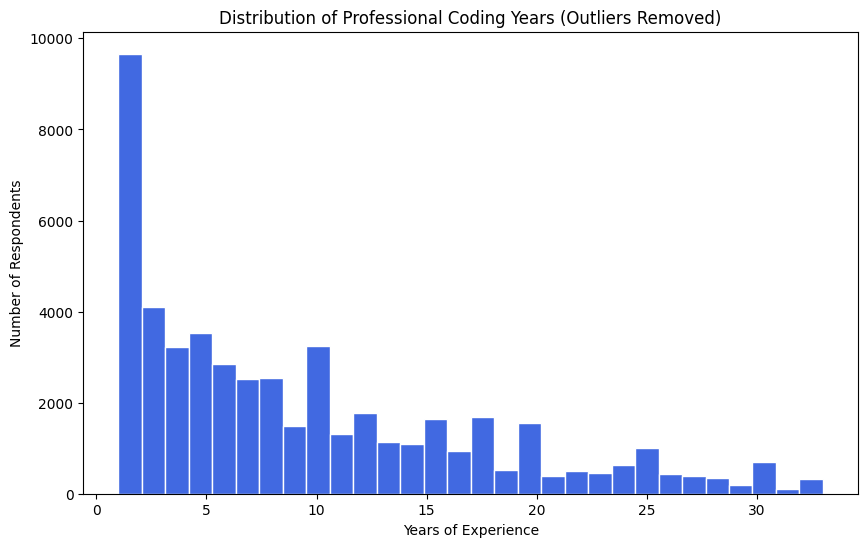

In [13]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

df['YearsCodePro'] = df['YearsCodePro'].str.extract('(\d+)').astype(float)
df = df.dropna()

Q1 = df['YearsCodePro'].quantile(0.25)
Q3 = df['YearsCodePro'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['YearsCodePro'] >= lower_bound) & (df['YearsCodePro'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['YearsCodePro'], bins=30, color='royalblue', edgecolor='white')

plt.title('Distribution of Professional Coding Years (Outliers Removed)')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


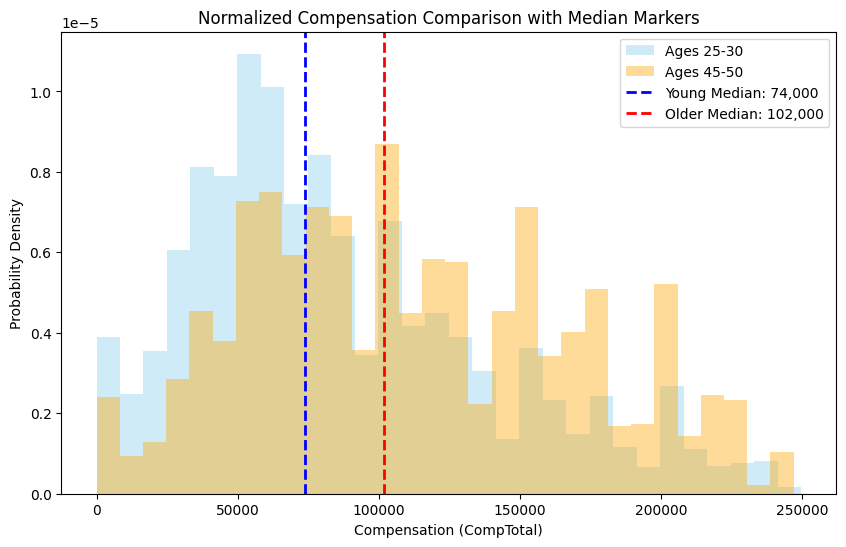

In [17]:
## Write your code here

conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df['AgeNum'] = df['Age'].str.extract('(\d+)').astype(float)
df = df.dropna(subset=['CompTotal', 'AgeNum'])

df_clean = df[df['CompTotal'] < 250000]

young = df_clean[(df_clean['AgeNum'] >= 25) & (df_clean['AgeNum'] <= 30)]['CompTotal']
older = df_clean[(df_clean['AgeNum'] >= 45) & (df_clean['AgeNum'] <= 50)]['CompTotal']

plt.figure(figsize=(10, 6))


plt.hist(young, bins=30, alpha=0.4, label='Ages 25-30', color='skyblue', density=True)
plt.hist(older, bins=30, alpha=0.4, label='Ages 45-50', color='orange', density=True)

plt.axvline(young.median(), color='blue', linestyle='dashed', linewidth=2, label=f'Young Median: {young.median():,.0f}')
plt.axvline(older.median(), color='red', linestyle='dashed', linewidth=2, label=f'Older Median: {older.median():,.0f}')

plt.title('Normalized Compensation Comparison with Median Markers')
plt.xlabel('Compensation (CompTotal)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


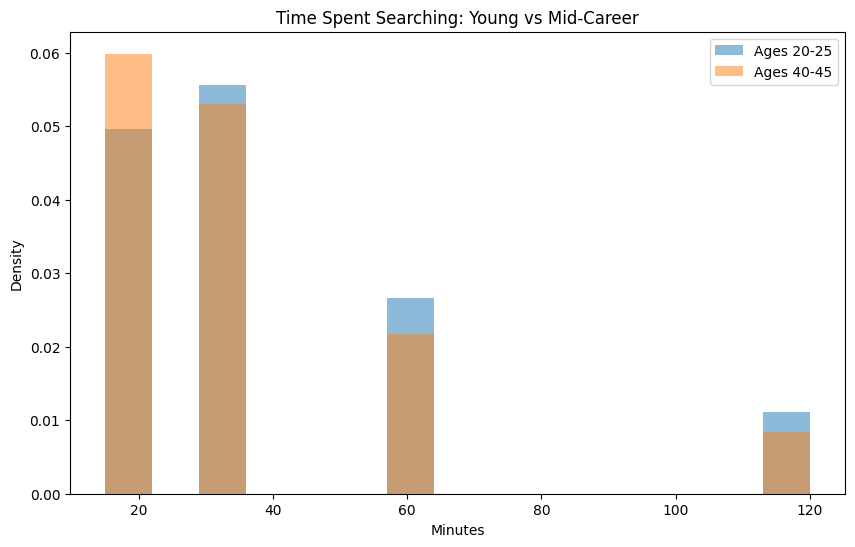

In [19]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey-data.sqlite')

# 1. Fetch data
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

df['AgeNum'] = df['Age'].str.extract('(\d+)').astype(float)
df['SearchNum'] = df['TimeSearching'].str.extract('(\d+)').astype(float)


df = df.dropna(subset=['AgeNum', 'SearchNum'])


young_search = df[(df['AgeNum'] >= 20) & (df['AgeNum'] <= 25)]['SearchNum']
mid_search = df[(df['AgeNum'] >= 40) & (df['AgeNum'] <= 45)]['SearchNum']

plt.figure(figsize=(10, 6))
plt.hist(young_search, bins=15, alpha=0.5, label='Ages 20-25', density=True)
plt.hist(mid_search, bins=15, alpha=0.5, label='Ages 40-45', density=True)

plt.title('Time Spent Searching: Young vs Mid-Career')
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.legend()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


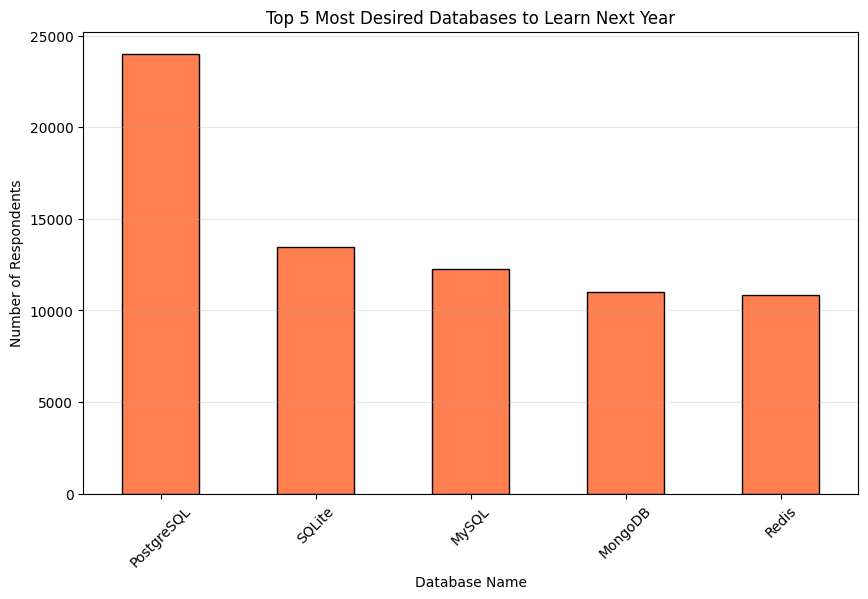

In [21]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

db_series = df['DatabaseWantToWorkWith'].str.split(';').explode()
db_counts = db_series.value_counts().head(5)

plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='coral', edgecolor='black')

plt.title('Top 5 Most Desired Databases to Learn Next Year')
plt.xlabel('Database Name')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


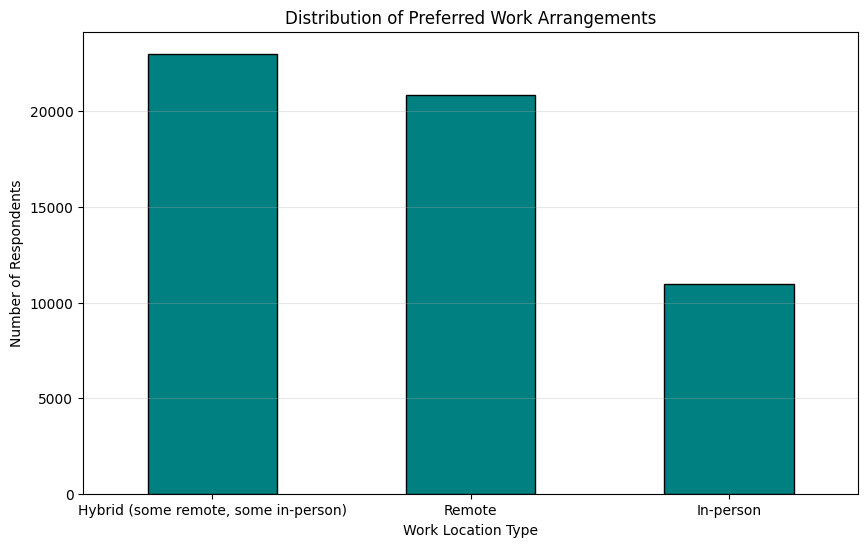

In [22]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)

work_counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(10, 6))
work_counts.plot(kind='bar', color='teal', edgecolor='black')

plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Location Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0) # Keeps labels horizontal for easier reading
plt.grid(axis='y', alpha=0.3)

plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


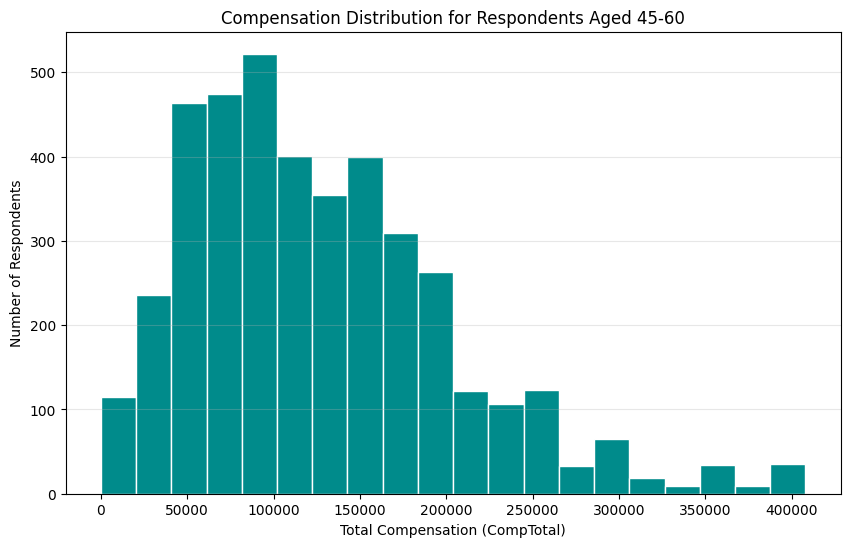

In [23]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df['AgeNum'] = df['Age'].str.extract('(\d+)').astype(float)
df = df.dropna(subset=['AgeNum', 'CompTotal'])

df_mid_career = df[(df['AgeNum'] >= 45) & (df['AgeNum'] <= 60)]


Q1 = df_mid_career['CompTotal'].quantile(0.25)
Q3 = df_mid_career['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_mid_career[df_mid_career['CompTotal'] <= upper_bound]

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=20, color='darkcyan', edgecolor='white')

plt.title('Compensation Distribution for Respondents Aged 45-60')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.3)

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


Juniors found: 8233
Seniors found: 3471


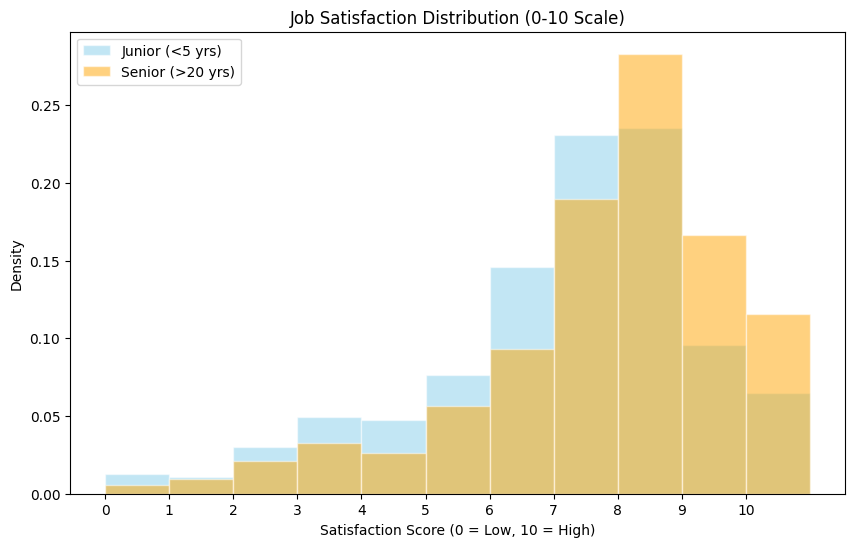

In [31]:
## Write your code hereimport sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('survey-data.sqlite')

# 1. Fetch data
query = "SELECT JobSat, YearsCodePro FROM main WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)

# 2. Extract Experience
df['YearsNumeric'] = df['YearsCodePro'].str.extract('(\d+)').astype(float)

# 3. NO MAPPING NEEDED: JobSat is already numeric (0-1
df['JobSatScore'] = df['JobSat'].astype(float)

junior = df[df['YearsNumeric'] < 5]
senior = df[df['YearsNumeric'] > 20]

print(f"Juniors found: {len(junior)}")
print(f"Seniors found: {len(senior)}")

plt.figure(figsize=(10, 6))

plt.hist(junior['JobSatScore'], bins=11, range=(0,11), alpha=0.5, 
         label='Junior (<5 yrs)', density=True, color='skyblue', edgecolor='white')

plt.hist(senior['JobSatScore'], bins=11, range=(0,11), alpha=0.5, 
         label='Senior (>20 yrs)', density=True, color='orange', edgecolor='white')

plt.title('Job Satisfaction Distribution (0-10 Scale)')
plt.xlabel('Satisfaction Score (0 = Low, 10 = High)')
plt.ylabel('Density')
plt.xticks(range(0, 11))
plt.legend()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
